In [1]:
import pandas as pd
from DeepRetail.forecasting.statistical import StatisticalForecaster
from DeepRetail.evaluation.base import Evaluator

In [6]:
# Load
df = pd.read_csv('C:/Users/u0153325/OneDrive - Hogeschool VIVES/Documenten/VIS/DeepRetail/DeepRetail/data/data_folder/m5_day.csv', index_col=0)

In [7]:
# Go monthly
df.columns = pd.to_datetime(df.columns)
df = df.resample('M', axis = 1).sum()

In [8]:
# get a sample 
sampled_df = df.sample(15)
sampled_df.head()

,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,...,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30
unique_id,,,,,,,,,,,,,,,,,,,,,
HOUSEHOLD_2_495_WI_1,3,15,13,5,18,3,4,2,0,0,...,0,0,0,0,0,0,0,9,8,5
HOUSEHOLD_1_200_CA_2,0,0,0,0,0,0,0,0,0,0,...,36,19,31,37,26,25,27,18,21,23
FOODS_2_310_CA_1,0,0,0,0,0,0,0,0,0,0,...,9,25,17,15,9,4,0,0,13,4
HOUSEHOLD_2_239_WI_3,2,16,29,47,46,36,29,26,14,17,...,53,48,34,38,39,27,23,20,20,18
HOUSEHOLD_1_521_CA_3,9,256,396,254,411,425,480,662,536,451,...,474,797,534,348,338,256,435,364,385,224


In [10]:
# Define parameters for forecasting
freq = 'M'
h = 6
holdout = True
cv = 2
models = ['ETS', 'Naive', 'ARIMA']

In [11]:
# Define the forecaster
forecaster = StatisticalForecaster(models = models, freq = freq)

# Fit the forecaster
forecaster.fit(sampled_df, format = 'pivoted')

# predict
forecast_df = forecaster.predict(h = h, cv = cv, holdout = holdout)

In [12]:
forecast_df.head()

,date,cutoff,unique_id,y,Model,True,fh,cv
0,2015-11-30,2015-09-30,FOODS_2_119_CA_4,43.000000,Naive,72,1,1
1,2015-11-30,2015-10-31,FOODS_2_119_CA_4,43.000000,Naive,72,1,2
2,2015-11-30,2015-09-30,FOODS_2_119_CA_4,31.315004,ARIMA,72,1,1
3,2015-11-30,2015-10-31,FOODS_2_119_CA_4,31.315004,ARIMA,72,1,2
4,2015-11-30,2015-09-30,FOODS_2_119_CA_4,33.820779,ETS,72,1,1


In [13]:
# Import metrics for evaluation
from DeepRetail.evaluation.metrics import rmsse, scaled_error

In [14]:
# Define metrics
metrics = [rmsse, scaled_error]

# Define the evaluator
evaluator = Evaluator(sampled_df, forecast_df, freq = freq, format = 'pivoted')

# Evaluate
eval_df = evaluator.evaluate(metrics = metrics)

In [15]:
eval_df.head()

,unique_id,Model,fh,cv,rmsse,scaled_error
0,FOODS_2_119_CA_4,ARIMA,1,1,3.114151,0.238366
1,FOODS_2_119_CA_4,ARIMA,1,2,3.114151,0.238366
2,FOODS_2_119_CA_4,ARIMA,2,1,1.380681,0.105681
3,FOODS_2_119_CA_4,ARIMA,2,2,1.380681,0.105681
4,FOODS_2_119_CA_4,ARIMA,3,1,1.182067,0.090479


In [16]:
# Evaluate without the fh and the cv
grouping = ['unique_id', 'Model']
eval_df_model = evaluator.evaluate(metrics = metrics, group_scores_by = grouping)
eval_df_model.head()

,unique_id,Model,rmsse,scaled_error
0,FOODS_2_119_CA_4,ARIMA,1.493919,0.069283
1,FOODS_2_119_CA_4,ETS,1.393147,0.056709
2,FOODS_2_119_CA_4,Naive,1.180434,0.002929
3,FOODS_2_310_CA_1,ARIMA,1.603696,-0.228586
4,FOODS_2_310_CA_1,ETS,1.944945,-0.288788


In [17]:
# Evaluate only per model
grouping = ['Model']
eval_df_model = evaluator.evaluate(metrics = metrics, group_scores_by = grouping)
eval_df_model.head()

,Model,rmsse,scaled_error
0,ARIMA,4.069794,-0.034873
1,ETS,4.392327,-0.077070
2,Naive,2.666327,-0.025323


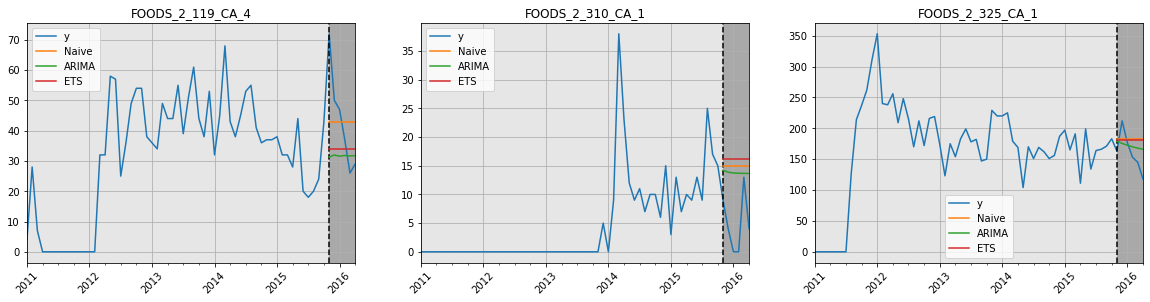

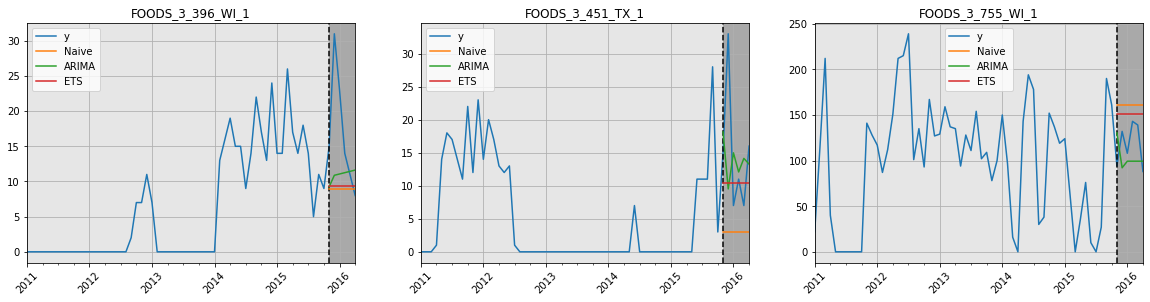

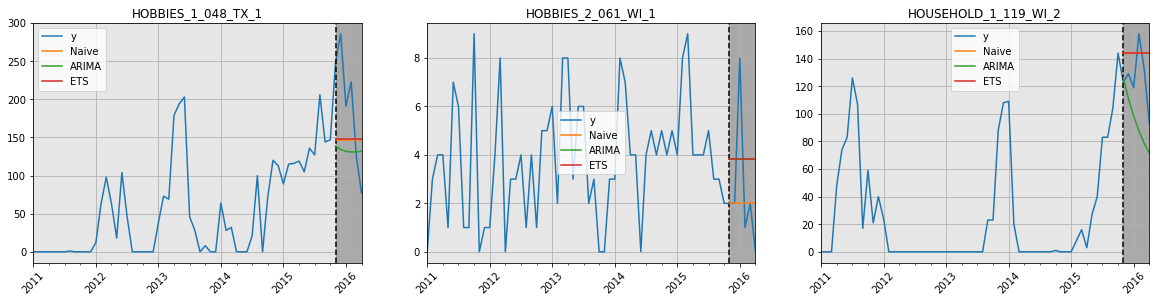

In [21]:
n = 9
show_in_sample = True
evaluator.plot_forecasts(n = n, show_in_sample = True)

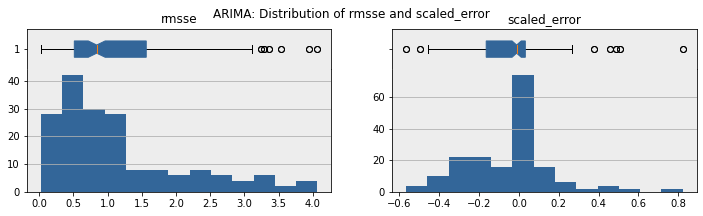

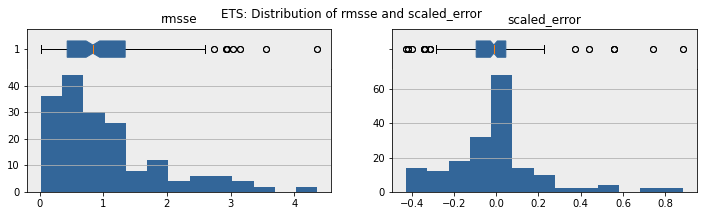

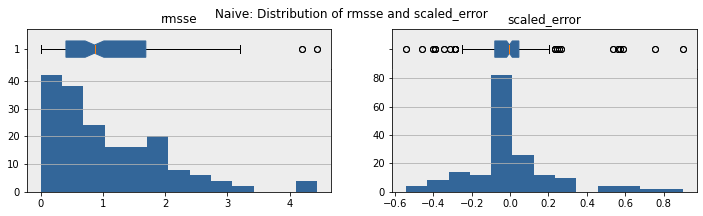

In [18]:
# Errors distribution
evaluator.plot_error_distribution()

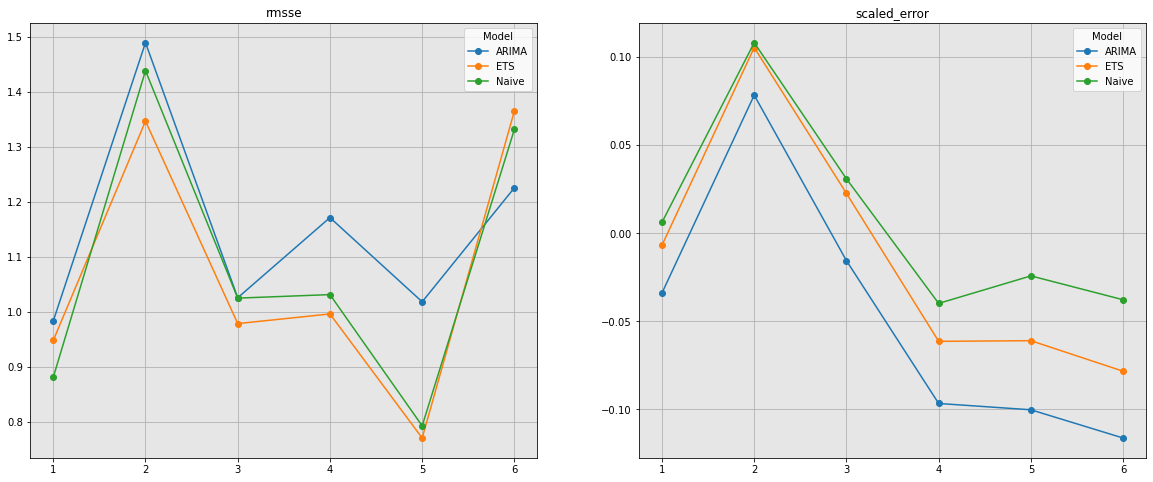

In [19]:
# Model summary plots
evaluator.plot_model_summary(metrics = metrics, type = 'line')

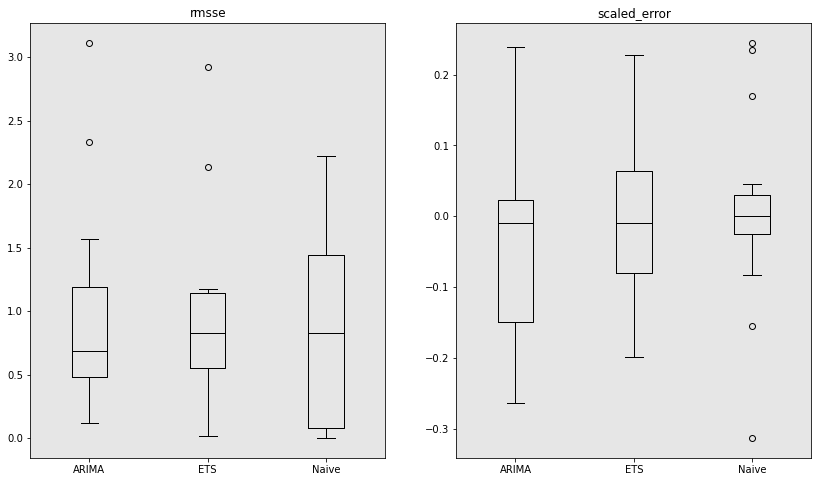

In [20]:
evaluator.plot_model_summary(metrics = metrics, type = 'boxplot')